# Worldwide Short-Term Rental Market Analysis

# 1: Exploratory Data Analysis

The first section of this report wil be around conducting an in-depth analysis on Air Bnb Data from the following cities: Toronto, Montreal, Barcelona, Vancouver, LA, Chicago, Stockholm & Sydney. These cities were chosen based on data availability on Insider Air Bnb website as well as their similar population size and being top tourist destinations in their respected province/country. This report only considers short term rental homes; meaning the minimum stay requirement must be less than or equal to 30 days. Each file must be examined for outliers, specifically for the price as it well greatly effect model accuracy in the later stages. After the data is cleaned, analysis can be conducted to uncover trends for the various variables in the dataset.

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import nltk

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel

import itertools
from collections import Counter
from collections import defaultdict

import json
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [2]:
sns.set(style="ticks")

In [3]:
path_tor = ('Toronto_listings.csv') #Toronto Data
path_van = ('Vancouver_listings.csv') #Vancouver Data
path_mtl = ('Montreal_listings.csv') #Montreal Data
path_bar = ('Barcelona_listings.csv') #Barcelona Data
path_la = ('LA_listings.csv') #LA Data
path_chi = ('Chicago_listings.csv') #Chicago Data
path_sto = ('Stockholm_listings.csv') #Stockholm Data
path_syd = ('Sydney_listings.csv') #Sydney Data
df_tor = pd.read_csv(path_tor, header=0, index_col=0)
df_van = pd.read_csv(path_van, header=0, index_col=0)
df_mtl = pd.read_csv(path_mtl, header=0, index_col=0)
df_bar = pd.read_csv(path_bar, header=0, index_col=0)
df_la = pd.read_csv(path_la, header=0, index_col=0)
df_chi = pd.read_csv(path_chi, header=0, index_col=0)
df_sto = pd.read_csv(path_sto, header=0, index_col=0)
df_syd = pd.read_csv(path_syd, header=0, index_col=0)
df_mtl.head() #Example of one of the datasets

,description,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood,latitude,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,
29059,"Lovely Studio with 1 Closed Room, Near Everyth...",125031,"Montreal, Quebec, Canada",within an hour,100%,88%,f,2.0,Ville-Marie,45.51939,...,323,344,4.70,4.82,4.70,4.81,4.79,4.80,4.73,f
29061,Surveying Heritage House dating from 1872 that...,125031,"Montreal, Quebec, Canada",within an hour,100%,88%,f,2.0,Ville-Marie,45.51929,...,283,85,4.62,4.82,4.60,4.81,4.73,4.85,4.66,f
31847,Come Stay in This Trendy Area of ​​Downtown Mo...,2319,"Montreal, QuÃ©bec, Canada",within an hour,100%,100%,f,6.0,Le Sud-Ouest,45.48467,...,350,157,4.52,4.60,4.52,4.71,4.84,4.74,4.66,t
34715,Welcome to Montreal > > Looking for an apartme...,149769,"Montreal, QuÃ©bec, Canada",within a few hours,100%,30%,f,1.0,Rosemont-La Petite-Patrie,45.53818,...,208,6,4.80,4.80,5.00,5.00,5.00,4.40,4.80,f
38118,Nearest Metro Papineau. > > The Space > Room...,163569,"Montreal, Quebec, Canada",within a few hours,100%,35%,f,3.0,Ville-Marie,45.52699,...,323,14,4.38,4.46,4.08,4.77,4.77,4.54,4.23,f


Each datasets contains prices ranging from just over ten dollars to thousand's of dollars per night (All prices in CAD). Using boxplots, the the upper limit and lower limits will be calculated to showcase data beyond those limits that will be removed as outliers.

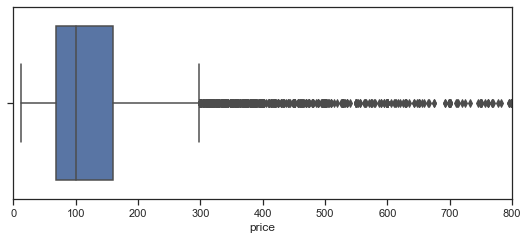

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_tor)
plt.xlim(0, 800)
plt.show()
#Toronto has outliers for prices that are over $300


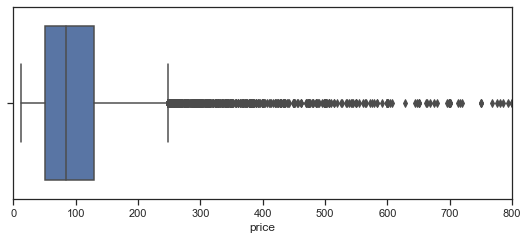

In [5]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_mtl)
plt.xlim(0, 800)
plt.show()
#Montreal has outliers for prices that are over $250

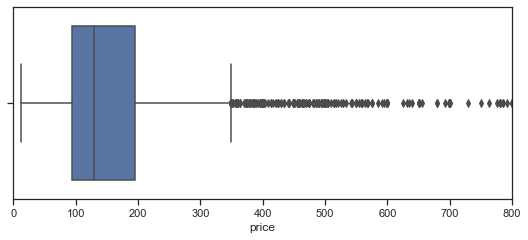

In [6]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_van)
plt.xlim(0, 800)
plt.show()
#Vancouver has outliers for prices that are over $350

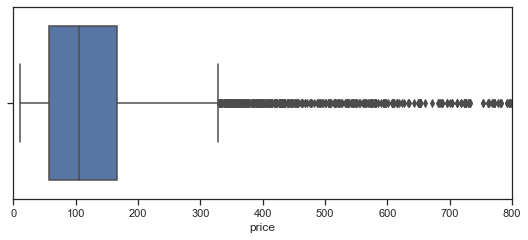

In [7]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_bar)
plt.xlim(0, 800)
plt.show()
#Barcelona has outliers for prices that are over $320

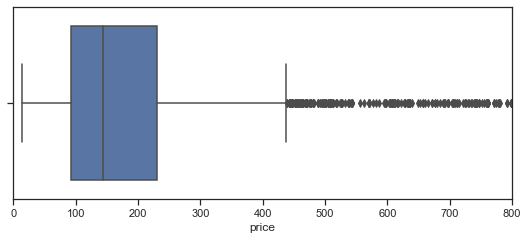

In [8]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_chi)
plt.xlim(0, 800)
plt.show()
#Chicago has outliers for prices that are over $450

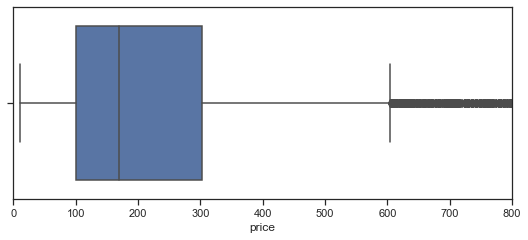

In [9]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_la)
plt.xlim(0, 800)
plt.show()
#LA has outliers for prices that are over $600

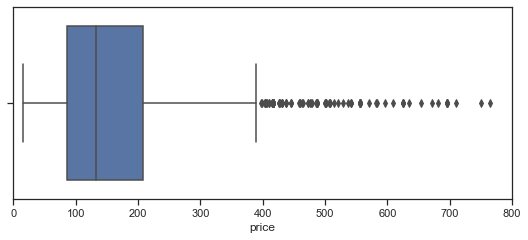

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_sto)
plt.xlim(0, 800)
plt.show()
#Stockholm has outliers for prices that are over $400

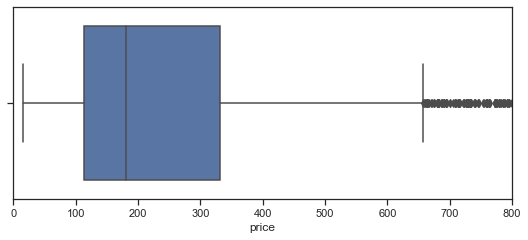

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.boxplot(x="price", data=df_syd)
plt.xlim(0, 800)
plt.show()
#Sydney has outliers for prices that are over $650

In [12]:
# Remove where Toronto prices > 300
condition = df_tor[df_tor['price'] > 300]
rows_to_drop = condition.index
print("Toronto dataset dropped {} rows.".format(condition.shape[0]))
df_tor = df_tor.drop(rows_to_drop, axis=0)
# Remove where Montreal prices > 250
condition = df_mtl[df_mtl['price'] > 250]
rows_to_drop = condition.index
print("Montreal dataset dropped {} rows.".format(condition.shape[0]))
df_mtl = df_mtl.drop(rows_to_drop, axis=0)
# Remove where Vancouver prices > 350
condition = df_van[df_van['price'] > 350]
rows_to_drop = condition.index
print("Vancouver dataset dropped {} rows.".format(condition.shape[0]))
df_van = df_van.drop(rows_to_drop, axis=0)
# Remove where Barcelona prices > 320
condition = df_bar[df_bar['price'] > 320]
rows_to_drop = condition.index
print("Barcelona dataset dropped {} rows.".format(condition.shape[0]))
df_bar = df_bar.drop(rows_to_drop, axis=0)
# Remove where Chicago prices > 450
condition = df_chi[df_chi['price'] > 450]
rows_to_drop = condition.index
print("Chicago dataset dropped {} rows.".format(condition.shape[0]))
df_chi = df_chi.drop(rows_to_drop, axis=0)
# Remove where LA prices > 600
condition = df_la[df_la['price'] > 600]
rows_to_drop = condition.index
print("LA dataset dropped {} rows.".format(condition.shape[0]))
df_la = df_la.drop(rows_to_drop, axis=0)
# Remove where Stockholm prices > 400
condition = df_sto[df_sto['price'] > 400]
rows_to_drop = condition.index
print("Stockholm dataset dropped {} rows.".format(condition.shape[0]))
df_sto = df_sto.drop(rows_to_drop, axis=0)
# Remove where Sydney prices > 650
condition = df_syd[df_syd['price'] > 650]
rows_to_drop = condition.index
print("Sydney dataset dropped {} rows.".format(condition.shape[0]))
df_syd = df_syd.drop(rows_to_drop, axis=0)

Toronto dataset dropped 848 rows.
Montreal dataset dropped 742 rows.
Vancouver dataset dropped 274 rows.
Barcelona dataset dropped 809 rows.
Chicago dataset dropped 457 rows.
LA dataset dropped 2764 rows.
Stockholm dataset dropped 134 rows.
Sydney dataset dropped 804 rows.


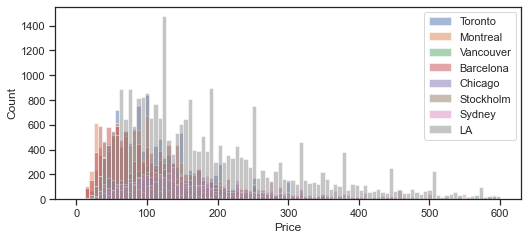

In [13]:
#Histogram of all the prices without outlier together
bins = np.linspace(0, 600, 100)

plt.hist(df_tor['price'], bins, alpha=0.5, label='Toronto')
plt.hist(df_mtl['price'], bins, alpha=0.5, label='Montreal')
plt.hist(df_van['price'], bins, alpha=0.5, label='Vancouver')
plt.hist(df_bar['price'], bins, alpha=0.5, label='Barcelona')
plt.hist(df_chi['price'], bins, alpha=0.5, label='Chicago')
plt.hist(df_sto['price'], bins, alpha=0.5, label='Stockholm')
plt.hist(df_syd['price'], bins, alpha=0.5, label='Sydney')
plt.hist(df_la['price'], bins, alpha=0.5, label='LA')
plt.legend(loc='upper right')
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()
#Here, we can see that each dataset follows an approximately Normal distribution.

Without considering any other variables, we can see that the cheapest short term rental prices for each city can be seen in the following order
1. Montreal
2. Barcelona
3. Toronto
4. Vancouver
5. Stockholm
6. Chicago
7. LA
8. Sydney

In [14]:
avg_price_tor = df_tor['price'].mean()
print('Average Price in Toronto:',avg_price_tor)
avg_price_mtl = df_mtl['price'].mean()
print('Average Price in Montreal:',avg_price_mtl)
avg_price_van = df_van['price'].mean()
print('Average Price in Vancouver:',avg_price_van)
avg_price_bar = df_bar['price'].mean()
print('Average Price in Barcelona:',avg_price_bar)
avg_price_la = df_la['price'].mean()
print('Average Price in LA:',avg_price_la)
avg_price_chi = df_chi['price'].mean()
print('Average Price in Chicago:',avg_price_chi)
avg_price_sto = df_sto['price'].mean()
print('Average Price in Stockholm:',avg_price_sto)
avg_price_syd = df_syd['price'].mean()
print('Average Price in Sydney:',avg_price_syd)

Average Price in Toronto: 112.33720287451631
Average Price in Montreal: 90.77771090380179
Average Price in Vancouver: 138.93323178471692
Average Price in Barcelona: 111.07678787347464
Average Price in LA: 188.87927863235882
Average Price in Chicago: 154.92729241197503
Average Price in Stockholm: 144.74633485888575
Average Price in Sydney: 202.76321315432233


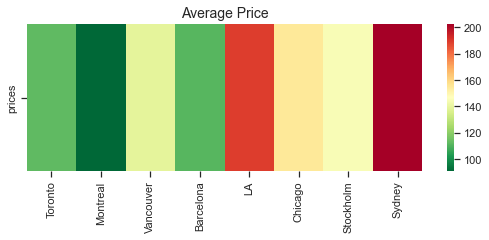

In [15]:
df_prices = pd.DataFrame(columns=('Toronto', 'Montreal','Vancouver','Barcelona','LA','Chicago','Stockholm','Sydney'))
values_to_add = {'Toronto': 112.34, 'Montreal': 90.77,'Vancouver': 138.93,'Barcelona': 111.07,'LA': 188.87,'Chicago': 154.92,'Stockholm': 144.74,'Sydney': 202.76}
row_to_add = pd.Series(values_to_add, name='prices')

df_prices = df_prices.append(row_to_add)
sns.heatmap(df_prices,cmap='RdYlGn_r')
plt.title("Average Price", size=14)
plt.tight_layout()

Each rental property has be classified into the following bins: Entire home/apt, Private room, Shared room & Hotel room.
The horizontal bar charts below tell us a story that almost all of the available properties for each city in this report are either an entire home or a private room.

Text(0.5, 1.0, 'Barcelona')

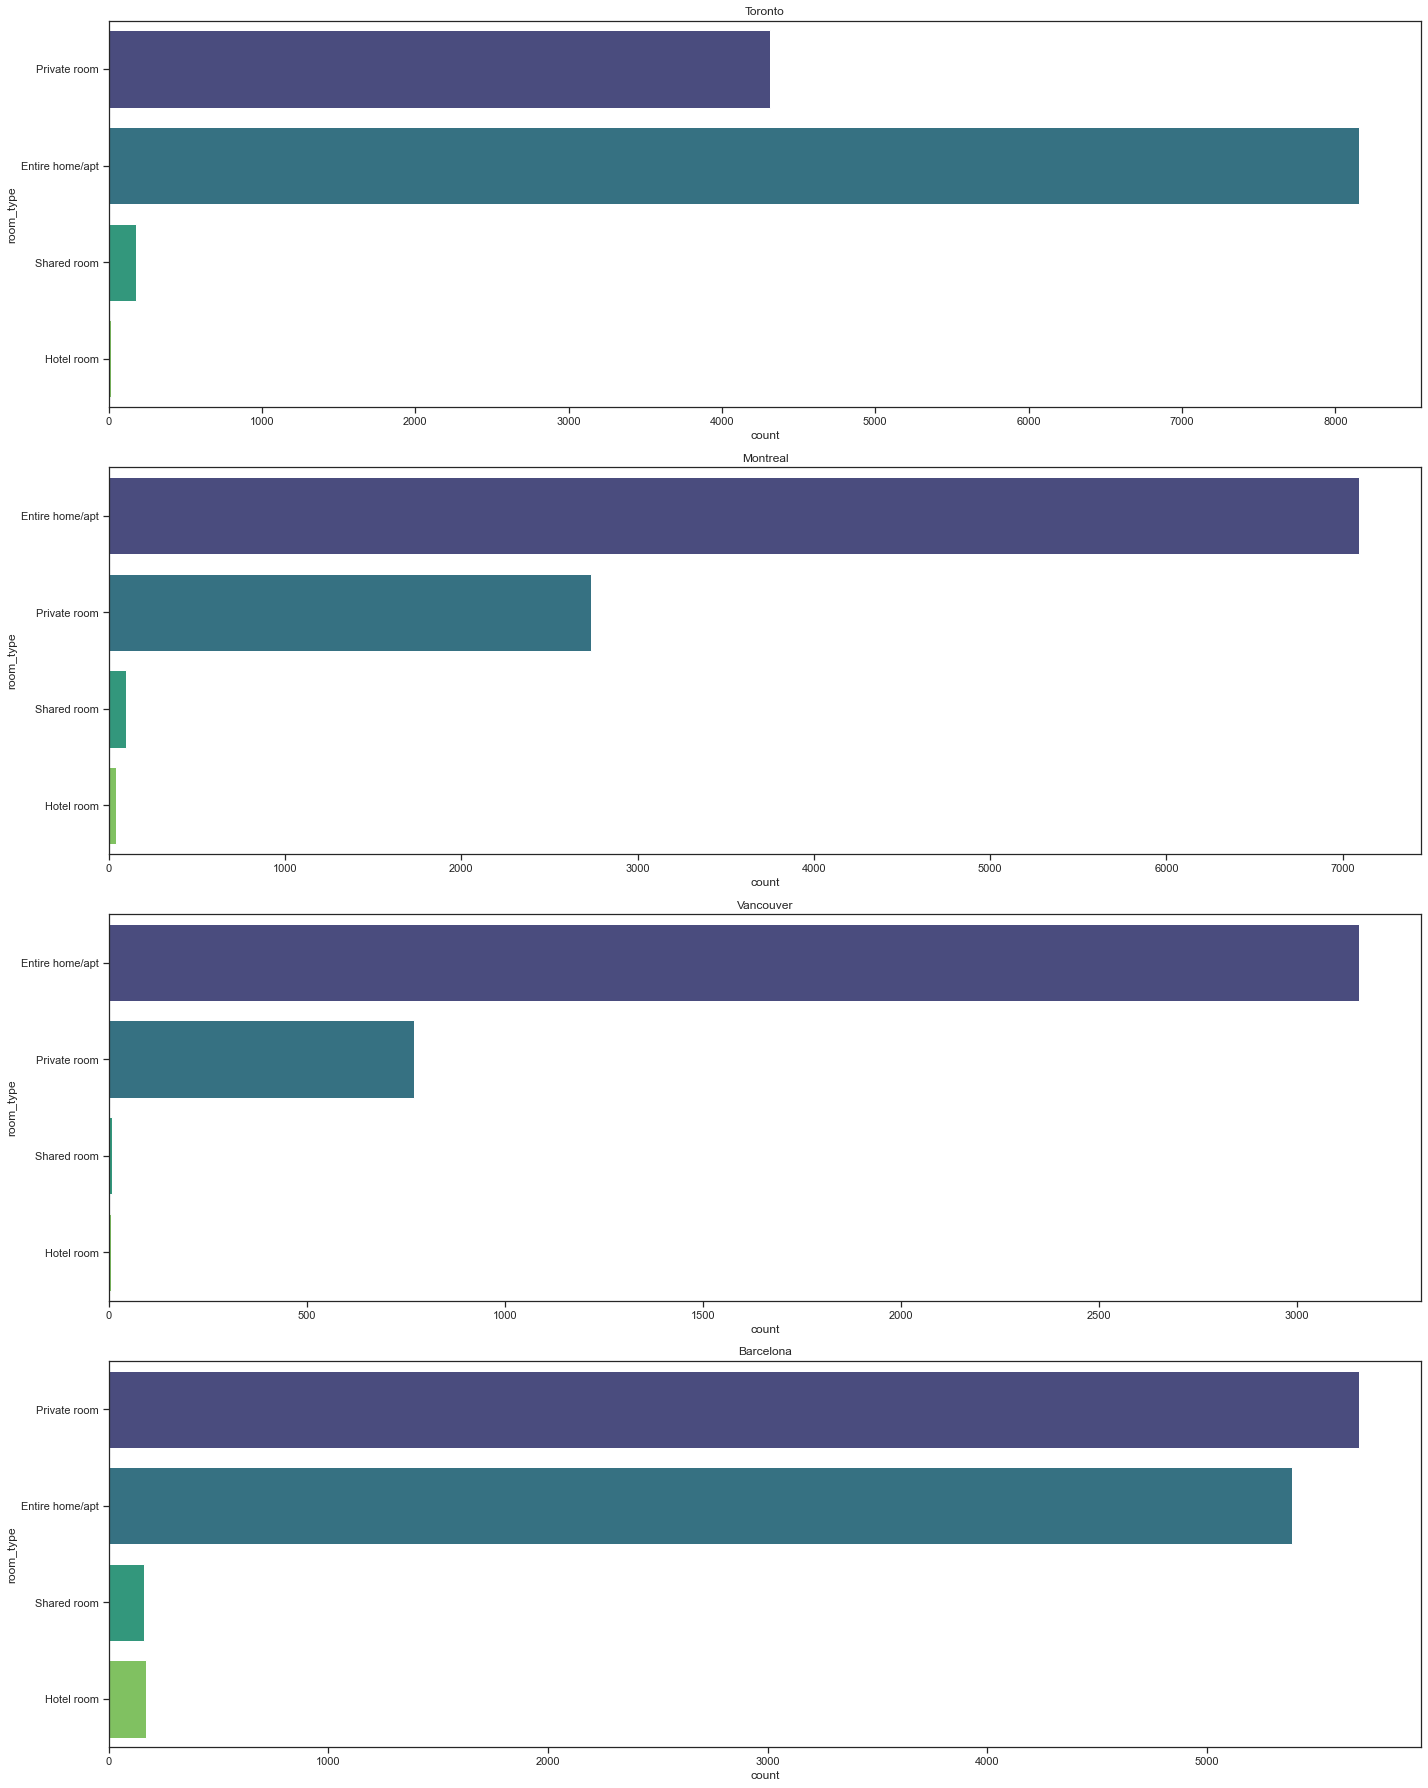

In [16]:
fig, ax =plt.subplots(4,figsize=(20, 25))
sns.countplot(y='room_type',data=df_tor,palette='viridis', ax=ax[0]).set_title('Toronto')
sns.countplot(y='room_type',data=df_mtl,palette='viridis', ax=ax[1]).set_title('Montreal')
sns.countplot(y='room_type',data=df_van,palette='viridis', ax=ax[2]).set_title('Vancouver')
sns.countplot(y='room_type',data=df_bar,palette='viridis', ax=ax[3]).set_title('Barcelona')

Text(0.5, 1.0, 'Sydney')

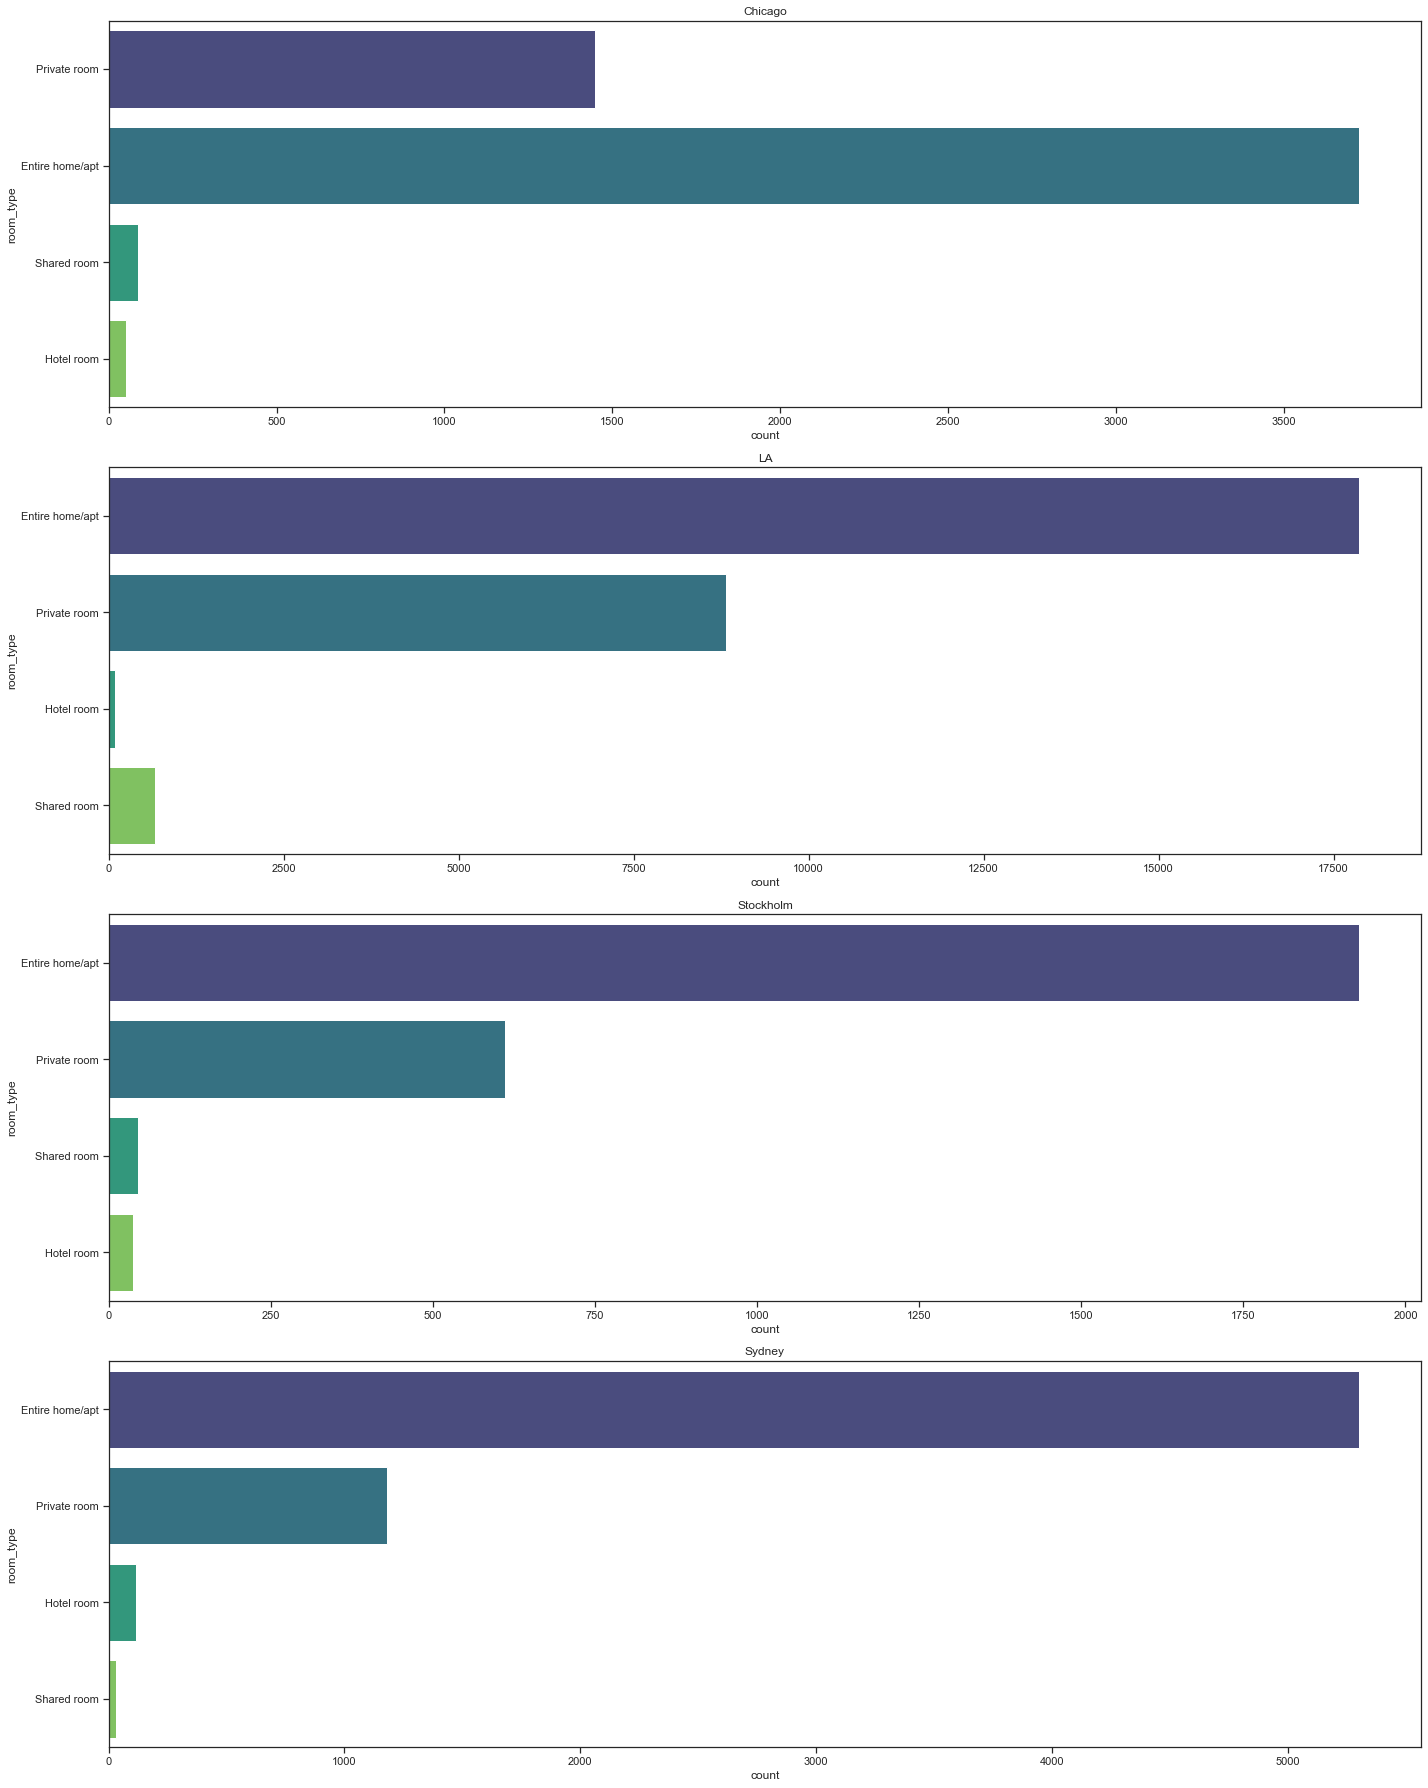

In [17]:
fig, ax =plt.subplots(4,figsize=(20, 25))
sns.countplot(y='room_type',data=df_chi,palette='viridis', ax=ax[0]).set_title('Chicago')
sns.countplot(y='room_type',data=df_la,palette='viridis', ax=ax[1]).set_title('LA')
sns.countplot(y='room_type',data=df_sto,palette='viridis', ax=ax[2]).set_title('Stockholm')
sns.countplot(y='room_type',data=df_syd,palette='viridis', ax=ax[3]).set_title('Sydney')

The heatmap below allows for the conclusion that the price will vary significantly based on the room type selected. Having a shared room is by far the cheapest option. This makes sense as staying in a shared room, you're give up your privacy and a shared room is unlikely to have several different amenities which will add to the overall cost. This also follows the cadence of the average price per city established earlier on in this report with Montreal being the cheapest and Sydney being the most expensive. Hotel rooms are by far the least frequent room type in the dataset with <100 in the data for each city. Most hotels are likely to have their own platform for user's to use which makes sense why there is a lack of data for these room types. ONly boutique hotels are on Air Bnb for the most part. Private rooms and Entire homes/apartments allow renters a sense of privacy. Given that an entire home/apartment gives more privacy, is a larger space and likely has more amenties, it makes sense that this room type is far more expensive than the three other bins. This bin is where we see the largest gap between cities. For example, the average entire home in LA or Sydney is twice as more expensive as an entire home in Montreal.

In [18]:
room_bin = ['Entire home/apt','Private room','Shared room','Hotel room']

sub1 = df_tor[df_tor.room_type.isin(room_bin)]
avg_room_price_tor = sub1.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Toronto:',avg_room_price_tor)

sub2 = df_mtl[df_mtl.room_type.isin(room_bin)]
avg_room_price_mtl = sub2.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Montreal:',avg_room_price_mtl)

sub3 = df_van[df_van.room_type.isin(room_bin)]
avg_room_price_van = sub3.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Vancouver:',avg_room_price_van)

sub4 = df_bar[df_bar.room_type.isin(room_bin)]
avg_room_price_bar = sub4.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Barcelona:',avg_room_price_bar)

sub5 = df_la[df_la.room_type.isin(room_bin)]
avg_room_price_la = sub5.groupby('room_type')['price'].mean()
print('Average Price per Room Type in LA:',avg_room_price_la)

sub6 = df_chi[df_chi.room_type.isin(room_bin)]
avg_room_price_chi = sub6.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Chicago:',avg_room_price_chi)

sub7 = df_sto[df_sto.room_type.isin(room_bin)]
avg_room_price_sto = sub7.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Stockholm:',avg_room_price_sto)

sub8 = df_syd[df_syd.room_type.isin(room_bin)]
avg_room_price_syd = sub8.groupby('room_type')['price'].mean()
print('Average Price per Room Type in Sydney:',avg_room_price_syd)

Average Price per Room Type in Toronto: room_type
Entire home/apt    135.701092
Hotel room          51.928571
Private room        71.408943
Shared room         40.150000
Name: price, dtype: float64
Average Price per Room Type in Montreal: room_type
Entire home/apt    106.137075
Hotel room         136.975000
Private room        52.345873
Shared room         35.430000
Name: price, dtype: float64
Average Price per Room Type in Vancouver: room_type
Entire home/apt    151.721483
Hotel room         171.000000
Private room        86.987013
Shared room         73.750000
Name: price, dtype: float64
Average Price per Room Type in Barcelona: room_type
Entire home/apt    152.809371
Hotel room         139.184884
Private room        72.327385
Shared room         54.490988
Name: price, dtype: float64
Average Price per Room Type in LA: room_type
Entire home/apt    232.845980
Hotel room         190.022000
Private room       109.565411
Shared room         60.268524
Name: price, dtype: float64
Average Pr

In [19]:
index = ['Entire home/apt','Private room','Shared room','Hotel room']
columns = ['Toronto', 'Montreal','Vancouver','Barcelona','LA','Chicago','Stockholm','Sydney']
df = pd.DataFrame(index=index, columns=columns)
df.loc['Entire home/apt'] = pd.Series({'Toronto': 135.70, 'Montreal': 106.13,'Vancouver': 151.72,'Barcelona': 152.80,'LA': 232.84,'Chicago':181.77 ,'Stockholm':167.19 ,'Sydney': 229.13})
df.loc['Private room'] = pd.Series({'Toronto': 71.4, 'Montreal': 52.34,'Vancouver': 86.98,'Barcelona': 72.32,'LA': 109.56,'Chicago': 91.4 ,'Stockholm':81.44 ,'Sydney':92.03 })
df.loc['Shared room'] = pd.Series({'Toronto': 40.15, 'Montreal': 35.43,'Vancouver': 73.75,'Barcelona': 54.49,'LA': 60.26,'Chicago': 60.98 ,'Stockholm':76.02,'Sydney':71.25})
df.loc['Hotel room'] = pd.Series({'Toronto': 51.92, 'Montreal': 136.97,'Vancouver': 171,'Barcelona': 139.18,'LA': 190.02,'Chicago': 158.60 ,'Stockholm': 105.77 ,'Sydney':161.72 })
df.dtypes
df["Toronto"] = df["Toronto"].astype(str).astype(float)
df["Montreal"] = df["Montreal"].astype(str).astype(float)
df["Vancouver"] = df["Vancouver"].astype(str).astype(float)
df["Barcelona"] = df["Barcelona"].astype(str).astype(float)
df["LA"] = df["LA"].astype(str).astype(float)
df["Chicago"] = df["Chicago"].astype(str).astype(float)
df["Stockholm"] = df["Stockholm"].astype(str).astype(float)
df["Sydney"] = df["Sydney"].astype(str).astype(float)
df.style.background_gradient(cmap='RdYlGn_r')

,Toronto,Montreal,Vancouver,Barcelona,LA,Chicago,Stockholm,Sydney
Entire home/apt,135.700000,106.130000,151.720000,152.800000,232.840000,181.770000,167.190000,229.130000
Private room,71.400000,52.340000,86.980000,72.320000,109.560000,91.400000,81.440000,92.030000
Shared room,40.150000,35.430000,73.750000,54.490000,60.260000,60.980000,76.020000,71.250000
Hotel room,51.920000,136.970000,171.000000,139.180000,190.020000,158.600000,105.770000,161.720000


Adding to the investigation above, the accommodation variable was added to the mix. Each stacked bar chart below showcases the linear relationship between the accommodation bins. As the accommodation bin size increases, the price increases. Logistically, this makes sense; as the more people that are staying at a unit, the more space, beds & bathrooms that will be required.

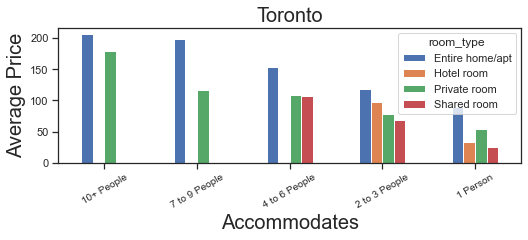

In [20]:
df_tor_accommodates_room_type_mean = df_tor.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_tor_accommodates_room_type_mean = df_tor_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_tor_accommodates_room_type_mean_pivot = pd.pivot_table(df_tor_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_tor_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Toronto', fontsize = 20)
labels=list(df_tor_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

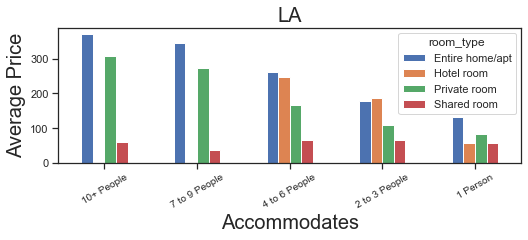

In [21]:
df_la_accommodates_room_type_mean = df_la.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_la_accommodates_room_type_mean = df_la_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_la_accommodates_room_type_mean_pivot = pd.pivot_table(df_la_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_la_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('LA', fontsize = 20)
labels=list(df_la_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

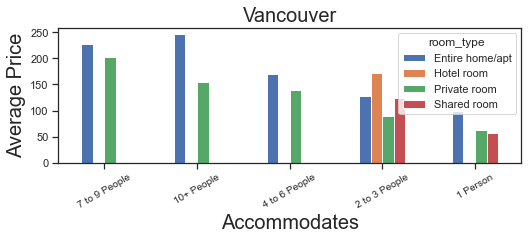

In [22]:
df_van_accommodates_room_type_mean = df_van.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_van_accommodates_room_type_mean = df_van_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_van_accommodates_room_type_mean_pivot = pd.pivot_table(df_van_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_van_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Vancouver', fontsize = 20)
labels=list(df_van_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

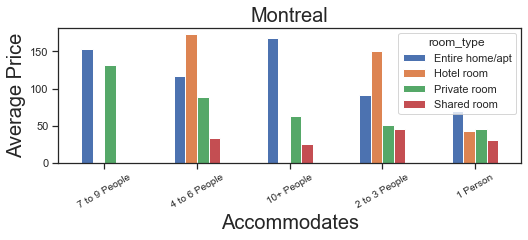

In [23]:
df_mtl_accommodates_room_type_mean = df_mtl.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_mtl_accommodates_room_type_mean = df_mtl_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_mtl_accommodates_room_type_mean_pivot = pd.pivot_table(df_mtl_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_mtl_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Montreal', fontsize = 20)
labels=list(df_mtl_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

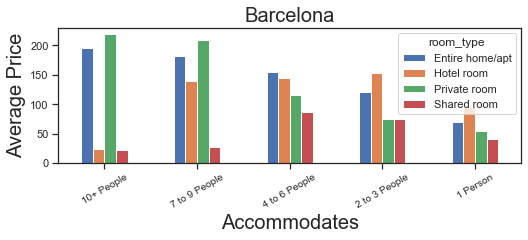

In [24]:
df_bar_accommodates_room_type_mean = df_bar.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_bar_accommodates_room_type_mean = df_bar_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_bar_accommodates_room_type_mean_pivot = pd.pivot_table(df_bar_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_bar_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Barcelona', fontsize = 20)
labels=list(df_bar_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

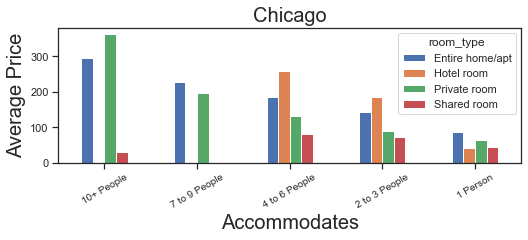

In [25]:
df_chi_accommodates_room_type_mean = df_chi.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_chi_accommodates_room_type_mean = df_chi_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_chi_accommodates_room_type_mean_pivot = pd.pivot_table(df_chi_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_chi_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Chicago', fontsize = 20)
labels=list(df_chi_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

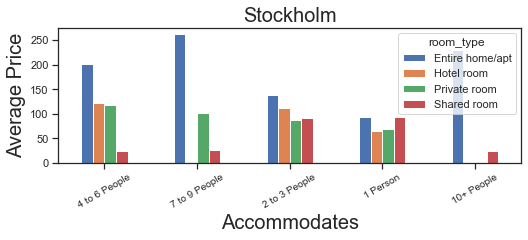

In [26]:
df_sto_accommodates_room_type_mean = df_sto.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_sto_accommodates_room_type_mean = df_sto_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_sto_accommodates_room_type_mean_pivot = pd.pivot_table(df_sto_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_sto_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Stockholm', fontsize = 20)
labels=list(df_sto_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

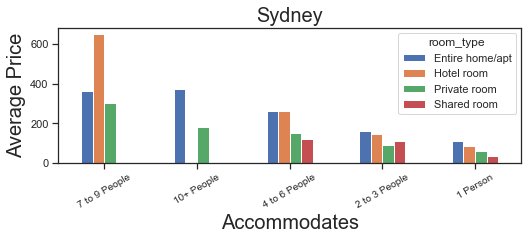

In [27]:
df_syd_accommodates_room_type_mean = df_syd.groupby(['Accomodation Bin', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()
#renaming a column
df_syd_accommodates_room_type_mean = df_syd_accommodates_room_type_mean.rename(columns = {'price': 'average_accommodates_price'})
#creating a pivot table
df_syd_accommodates_room_type_mean_pivot = pd.pivot_table(df_syd_accommodates_room_type_mean, values='average_accommodates_price', 
                           index=['Accomodation Bin'], columns=['room_type'])
ax=df_syd_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('Accommodates', fontsize = 20)
ax.set_ylabel('Average Price', fontsize = 20)
ax.set_title('Sydney', fontsize = 20)
labels=list(df_syd_accommodates_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:15])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

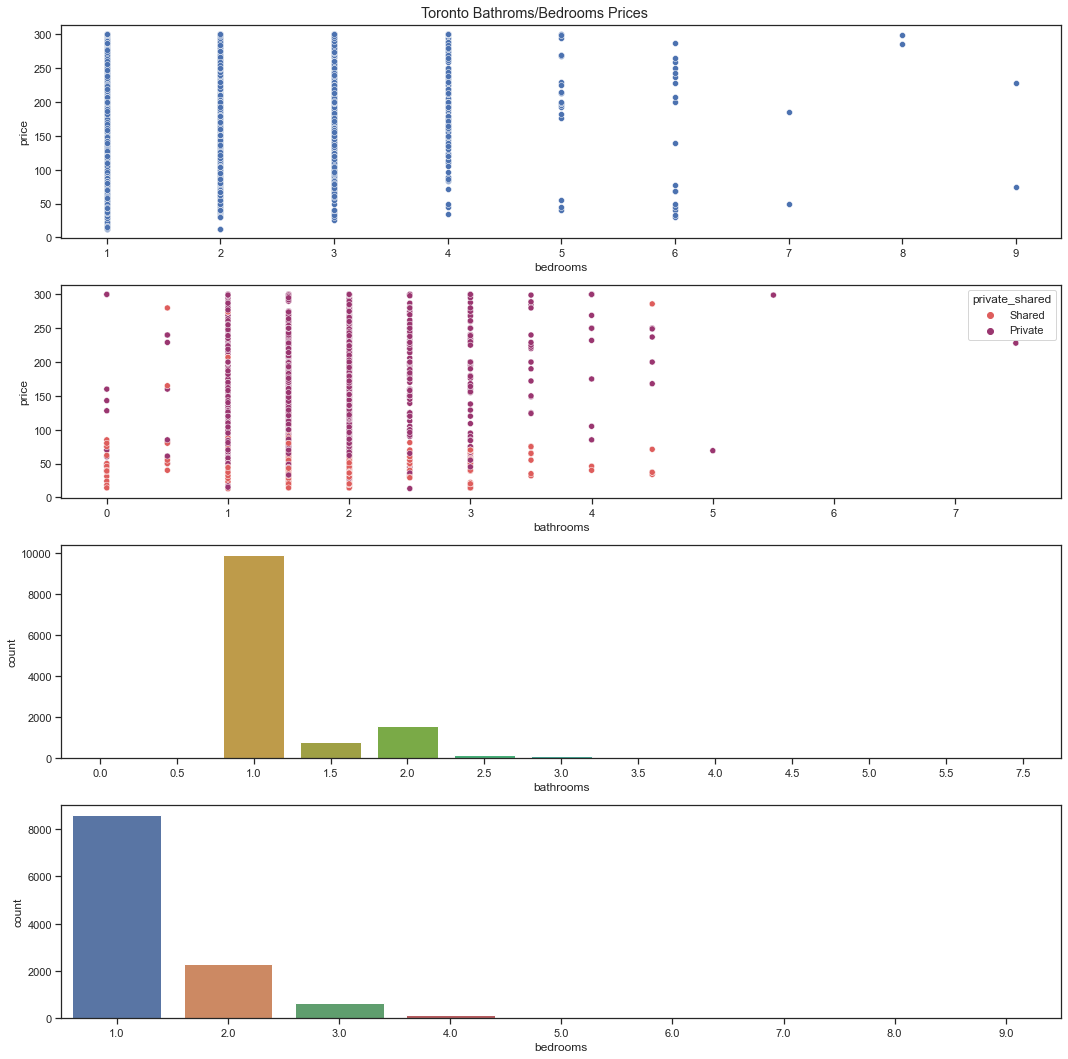

In [28]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Toronto Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_tor, x="bedrooms", y="price", palette='Accent', ax=ax[0])
sns.scatterplot(data=df_tor, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_tor, ax=ax[2])
sns.countplot(x="bedrooms", data=df_tor, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

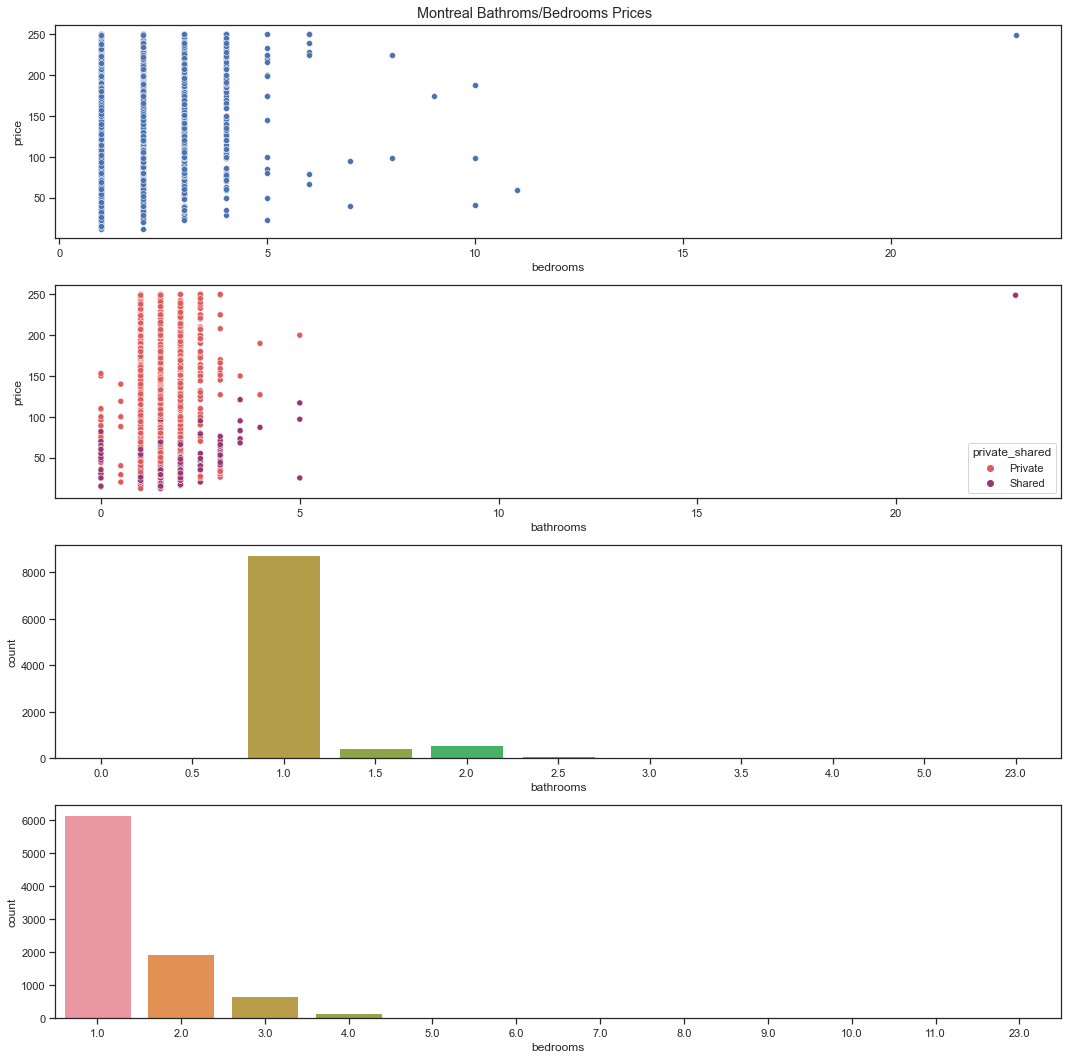

In [29]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Montreal Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_mtl, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_mtl, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_mtl, ax=ax[2])
sns.countplot(x="bedrooms", data=df_mtl, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

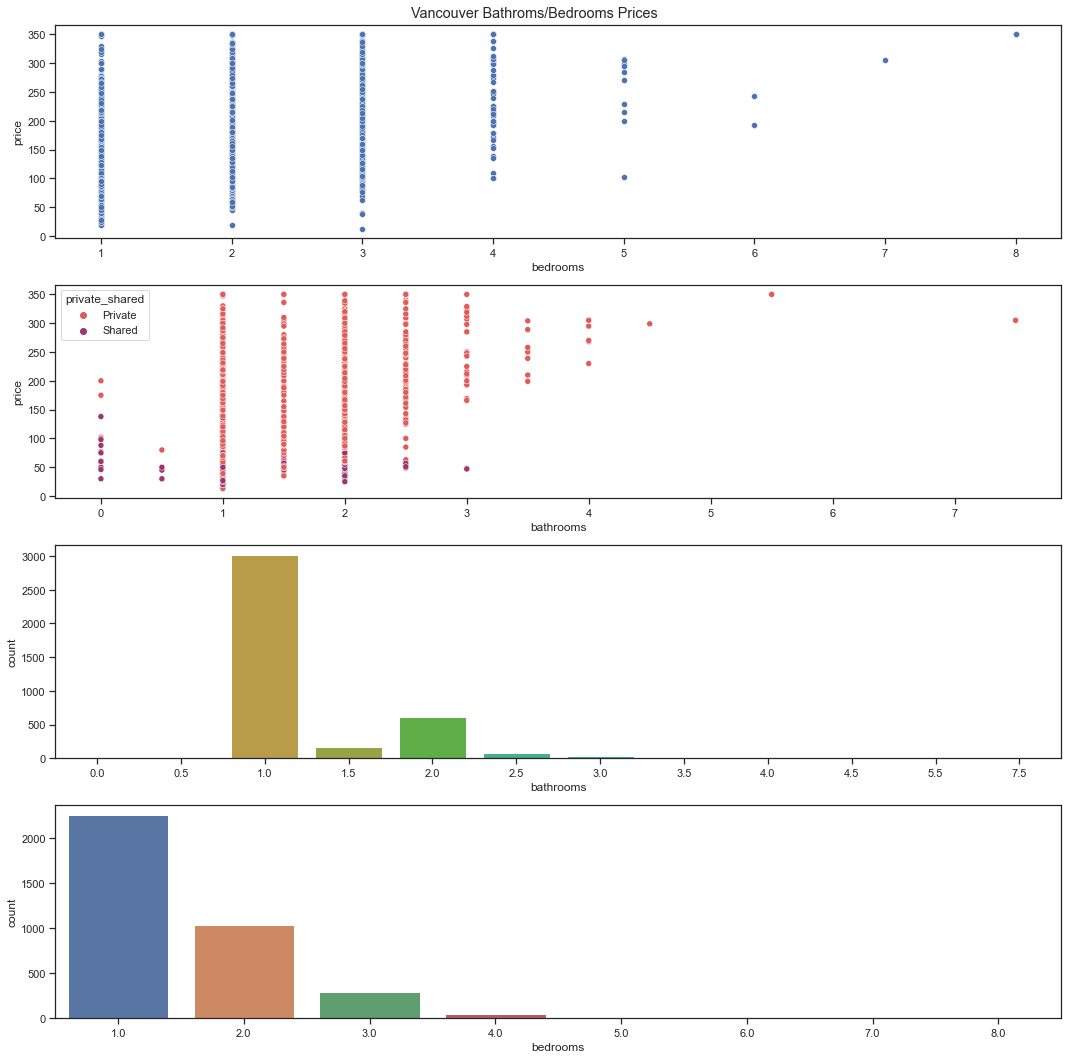

In [30]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Vancouver Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_van, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_van, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_van, ax=ax[2])
sns.countplot(x="bedrooms", data=df_van, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

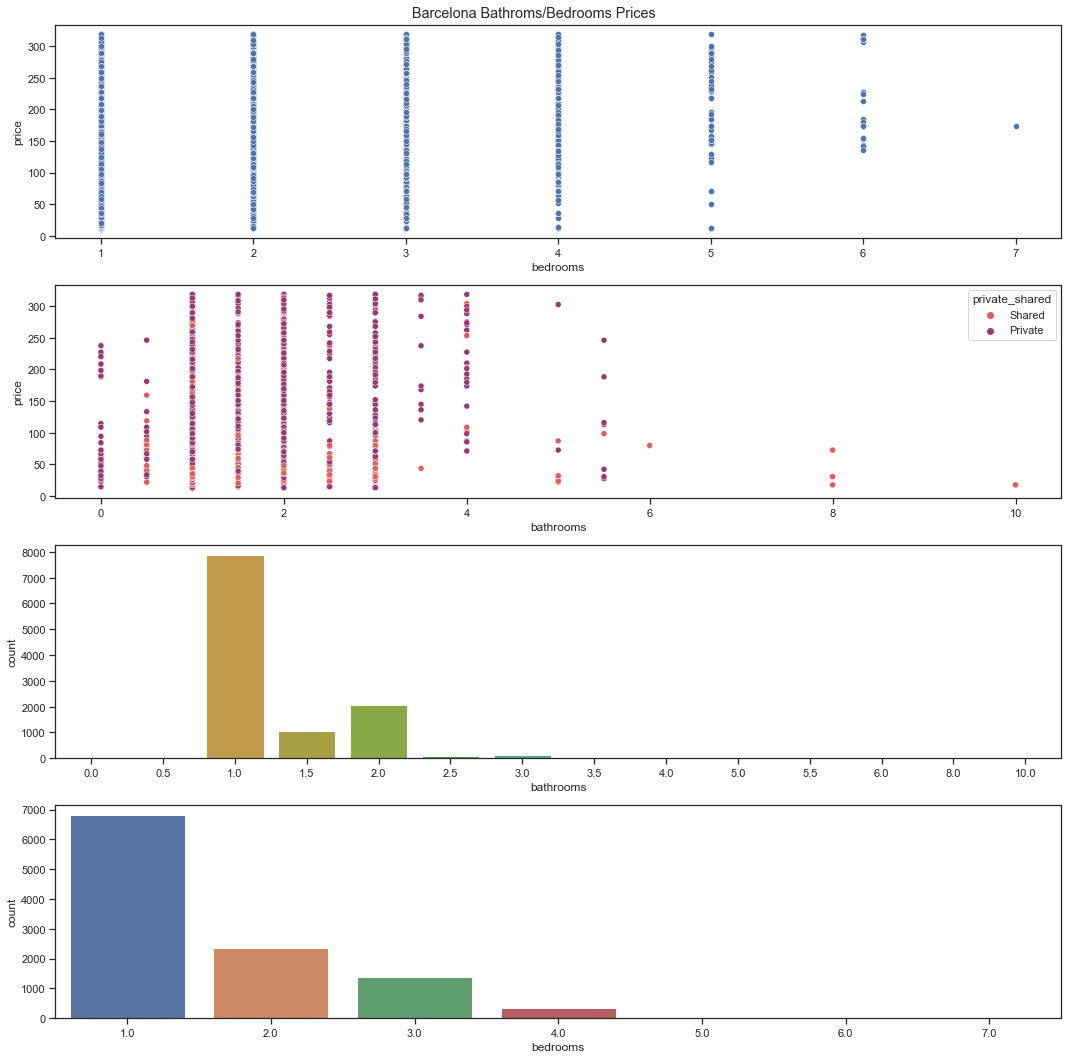

In [31]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Barcelona Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_bar, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_bar, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_bar, ax=ax[2])
sns.countplot(x="bedrooms", data=df_bar, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

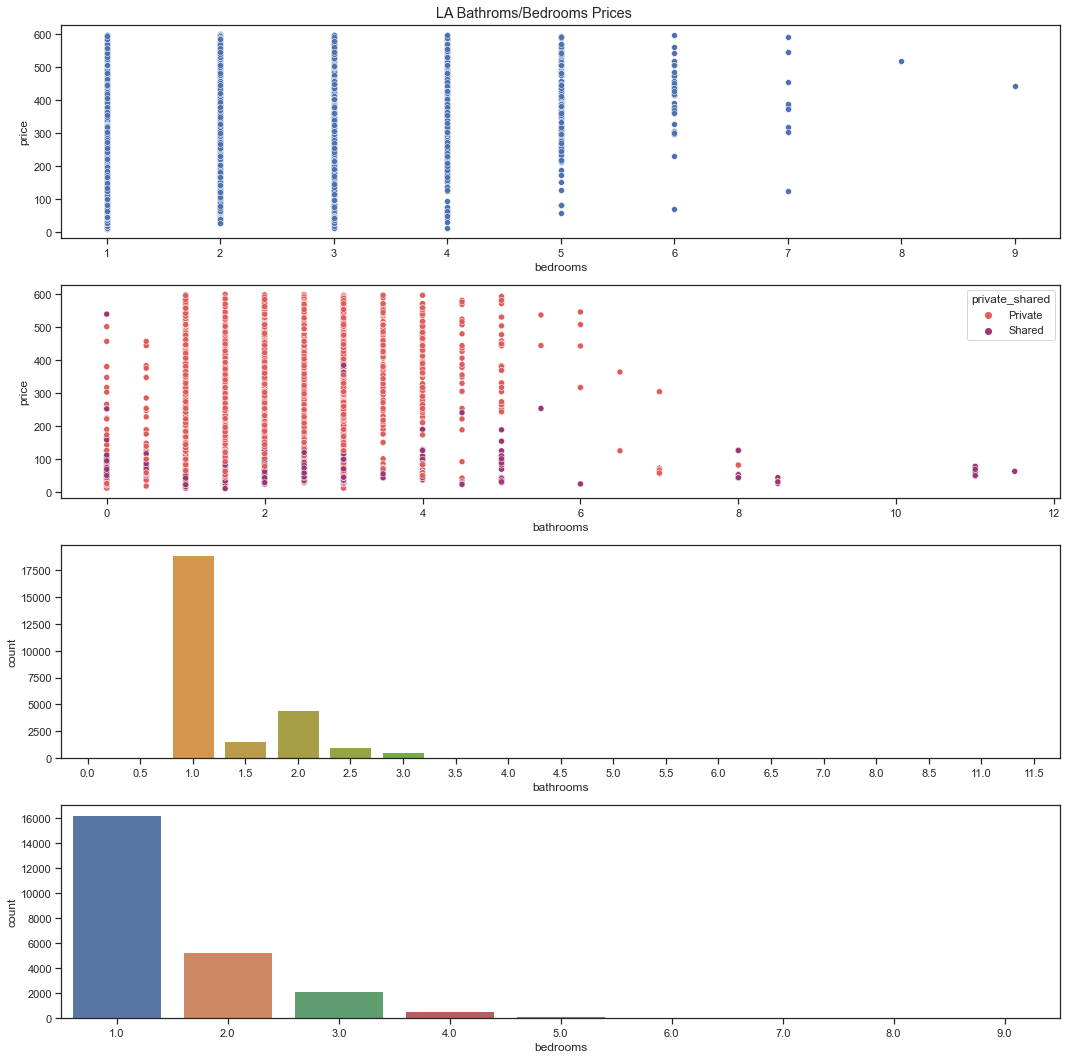

In [32]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('LA Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_la, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_la, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_la, ax=ax[2])
sns.countplot(x="bedrooms", data=df_la, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

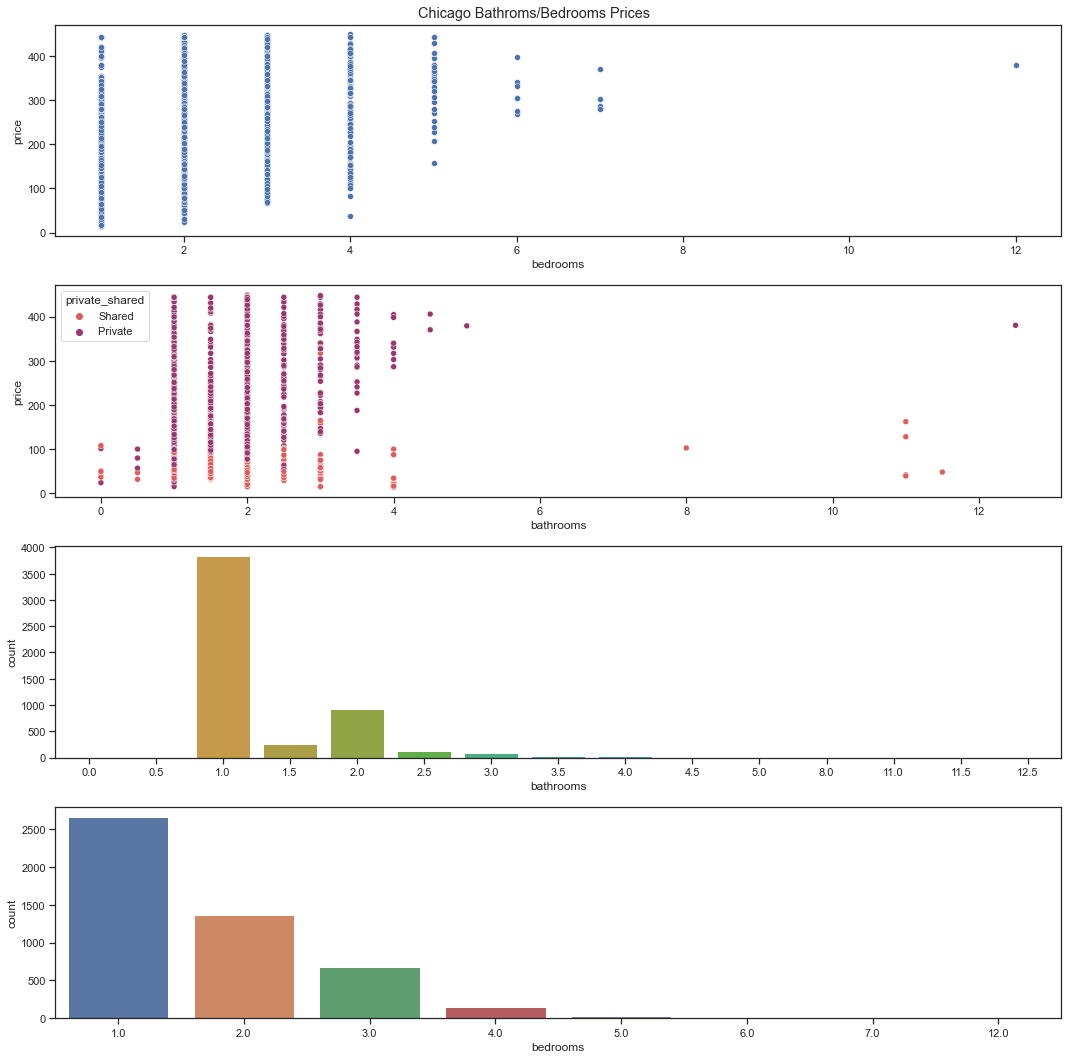

In [33]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Chicago Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_chi, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_chi, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_chi, ax=ax[2])
sns.countplot(x="bedrooms", data=df_chi, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

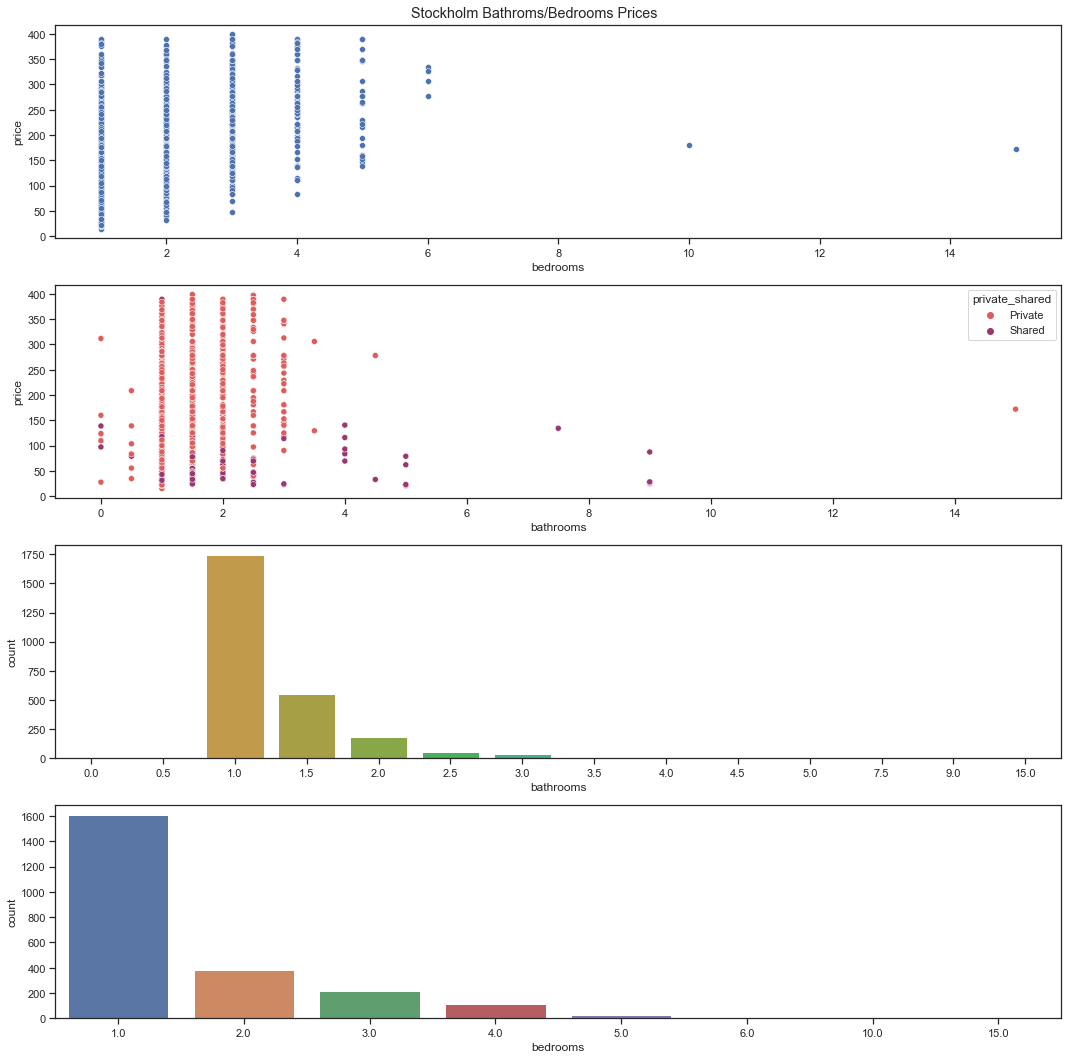

In [34]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Stockholm Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_sto, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_sto, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_sto, ax=ax[2])
sns.countplot(x="bedrooms", data=df_sto, ax=ax[3])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

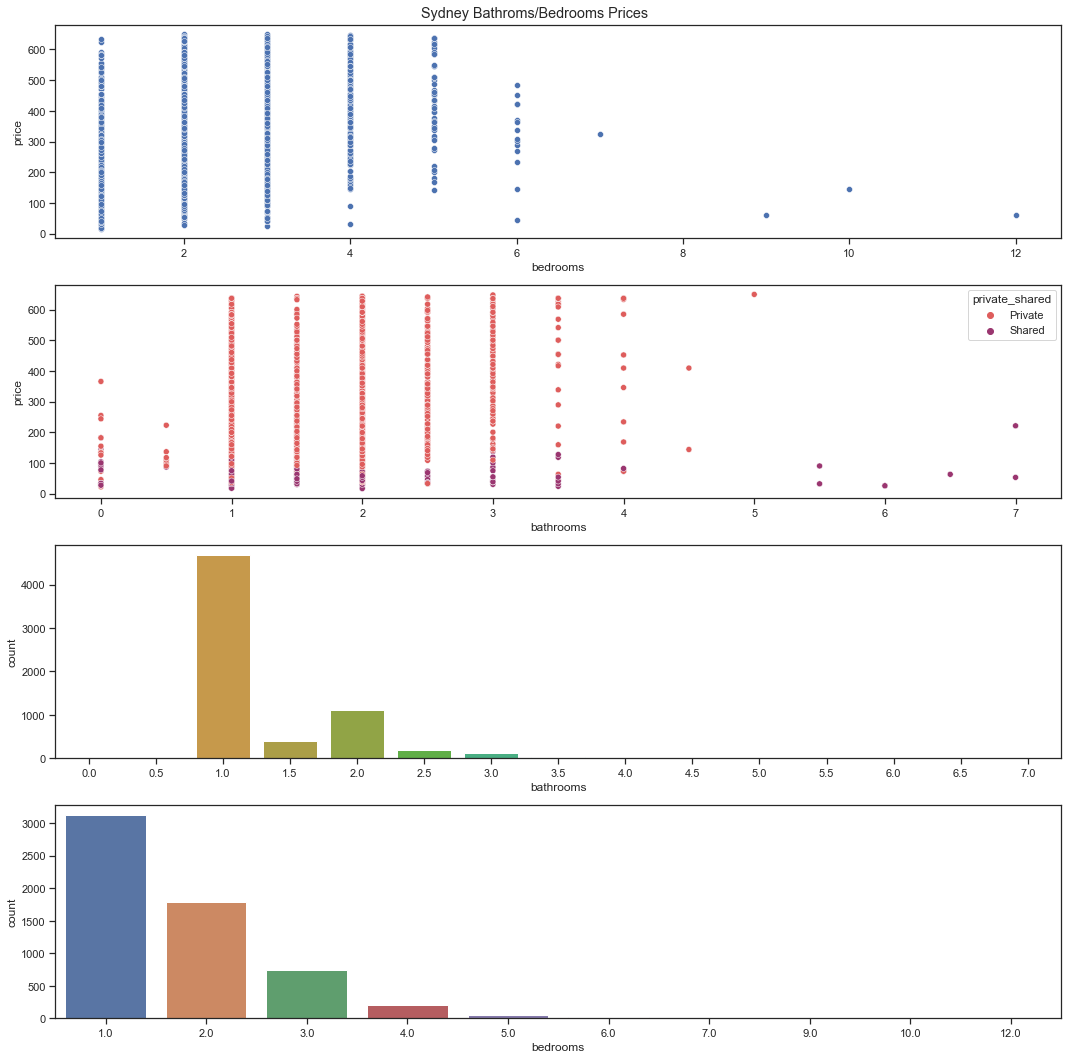

In [35]:
fig,ax =plt.subplots(4,figsize=(15, 15))
fig.suptitle('Sydney Bathroms/Bedrooms Prices')
sns.scatterplot(data=df_syd, x="bedrooms", y="price",palette='Accent', ax=ax[0])
sns.scatterplot(data=df_syd, x="bathrooms", y="price", hue='private_shared',palette='flare', ax=ax[1])
sns.countplot(x="bathrooms", data=df_syd, ax=ax[2])
sns.countplot(x="bedrooms", data=df_syd, ax=ax[3])

After sifting through the scatterplots and bar charts for each city, the amount of bedrooms tends to drop off significantly after ~4 and the bathrooms tend to drop off at ~3. As I did for the price variable, the outliers for both bathrooms & bedrooms wil be removed to not throw off the model accuracy in a later step.

It's also important to call out the significance of each variable. Per the scatterplots above, the number of bedrooms doesn't impact the price very much. There can be expensive 1 bedroom home and expensive 4 bedroom homes. What is significant is the bathrooms. Properties with 0 bathrooms tend to have significantly lower prices than properties that do. This makes sense as a bathroom is an essential amentinty that most people would want. Bathroms that are also shared tend to have lower prices than those that are private. This also makes sense as if you have a shared bathroom you're giving up a sense of privacy.

In [36]:
#Remove where bedrooms > 4
print("\033[1m" + 'Bedrooms dropped' + "\033[0m")
condition = df_tor[df_tor['bedrooms'] > 4]
rows_to_drop = condition.index
print("Toronto dataset dropped {} rows.".format(condition.shape[0]))
df_tor = df_tor.drop(rows_to_drop, axis=0)
condition = df_mtl[df_mtl['bedrooms'] > 4]
rows_to_drop = condition.index
print("Montreal dataset dropped {} rows.".format(condition.shape[0]))
df_mtl = df_mtl.drop(rows_to_drop, axis=0)
condition = df_van[df_van['bedrooms'] > 4]
rows_to_drop = condition.index
print("Vancouver dataset dropped {} rows.".format(condition.shape[0]))
df_van = df_van.drop(rows_to_drop, axis=0)
condition = df_bar[df_bar['bedrooms'] > 4]
rows_to_drop = condition.index
print("Barcelona dataset dropped {} rows.".format(condition.shape[0]))
df_bar = df_bar.drop(rows_to_drop, axis=0)
condition = df_chi[df_chi['bedrooms'] > 4]
rows_to_drop = condition.index
print("Chicago dataset dropped {} rows.".format(condition.shape[0]))
df_chi = df_chi.drop(rows_to_drop, axis=0)
condition = df_la[df_la['bedrooms'] > 4]
rows_to_drop = condition.index
print("LA dataset dropped {} rows.".format(condition.shape[0]))
df_la = df_la.drop(rows_to_drop, axis=0)
condition = df_sto[df_sto['bedrooms'] > 4]
rows_to_drop = condition.index
print("Stockholm dataset dropped {} rows.".format(condition.shape[0]))
df_sto = df_sto.drop(rows_to_drop, axis=0)
condition = df_syd[df_syd['bedrooms'] > 4]
rows_to_drop = condition.index
print("Sydney dataset dropped {} rows.".format(condition.shape[0]))
df_syd = df_syd.drop(rows_to_drop, axis=0)
# Remove where bathrooms > 3
print("\033[1m" + 'Bathrooms dropped' + "\033[0m")
condition = df_tor[df_tor['bathrooms'] > 3]
rows_to_drop = condition.index
print("Toronto dataset dropped {} rows.".format(condition.shape[0]))
df_tor = df_tor.drop(rows_to_drop, axis=0)
condition = df_mtl[df_mtl['bathrooms'] > 3]
rows_to_drop = condition.index
print("Montreal dataset dropped {} rows.".format(condition.shape[0]))
df_mtl = df_mtl.drop(rows_to_drop, axis=0)
condition = df_van[df_van['bathrooms'] > 3]
rows_to_drop = condition.index
print("Vancouver dataset dropped {} rows.".format(condition.shape[0]))
df_van = df_van.drop(rows_to_drop, axis=0)
condition = df_bar[df_bar['bathrooms'] > 3]
rows_to_drop = condition.index
print("Barcelona dataset dropped {} rows.".format(condition.shape[0]))
df_bar = df_bar.drop(rows_to_drop, axis=0)
condition = df_chi[df_chi['bathrooms'] > 3]
rows_to_drop = condition.index
print("Chicago dataset dropped {} rows.".format(condition.shape[0]))
df_chi = df_chi.drop(rows_to_drop, axis=0)
condition = df_la[df_la['bathrooms'] > 3]
rows_to_drop = condition.index
print("LA dataset dropped {} rows.".format(condition.shape[0]))
df_la = df_la.drop(rows_to_drop, axis=0)
condition = df_sto[df_sto['bathrooms'] > 3]
rows_to_drop = condition.index
print("Stockholm dataset dropped {} rows.".format(condition.shape[0]))
df_sto = df_sto.drop(rows_to_drop, axis=0)
condition = df_syd[df_syd['bathrooms'] > 3]
rows_to_drop = condition.index
print("Sydney dataset dropped {} rows.".format(condition.shape[0]))
df_syd = df_syd.drop(rows_to_drop, axis=0)

Bedrooms dropped
Toronto dataset dropped 46 rows.
Montreal dataset dropped 35 rows.
Vancouver dataset dropped 15 rows.
Barcelona dataset dropped 79 rows.
Chicago dataset dropped 41 rows.
LA dataset dropped 189 rows.
Stockholm dataset dropped 32 rows.
Sydney dataset dropped 65 rows.
Bathrooms dropped
Toronto dataset dropped 54 rows.
Montreal dataset dropped 15 rows.
Vancouver dataset dropped 8 rows.
Barcelona dataset dropped 53 rows.
Chicago dataset dropped 44 rows.
LA dataset dropped 362 rows.
Stockholm dataset dropped 24 rows.
Sydney dataset dropped 36 rows.


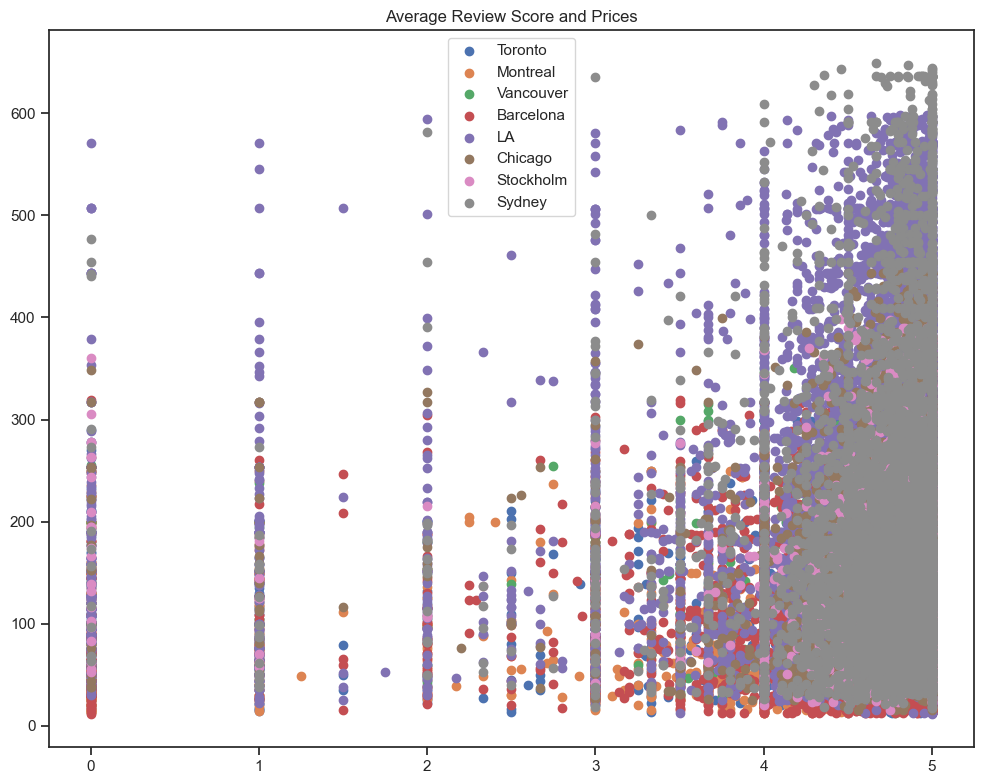

In [37]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df_tor['review_scores_rating'], df_tor['price'], label ='Toronto')
plt.scatter(df_mtl['review_scores_rating'], df_mtl['price'], label ='Montreal')
plt.scatter(df_van['review_scores_rating'], df_van['price'],label='Vancouver')
plt.scatter(df_bar['review_scores_rating'], df_bar['price'], label ='Barcelona')
plt.scatter(df_la['review_scores_rating'], df_la['price'], label ='LA')
plt.scatter(df_chi['review_scores_rating'], df_chi['price'],label='Chicago')
plt.scatter(df_sto['review_scores_rating'], df_sto['price'], label ='Stockholm')
plt.scatter(df_syd['review_scores_rating'], df_syd['price'],label='Sydney')

plt.title('Average Review Score and Prices')
plt.legend()
plt.show()


The scatterplot above shows the insignificance of the average review score variable on the price. A large majority of properties have between a 4/5 star score. There's no distinguishable trend based on location. There can be cheap 4/5 star properties and there can be expensive 4/5 star properties. The inverse can also be said around 0 star properties. The attitude of the host and cleanliness of the rental property like play a large role in the review score, which are not measured in the given datasets.  

# 2: Text Mining

This section we will be using the Latent Dirichlet Allocation (LDA) model to uncover hidden structures in the description variable for each dataset. The description variable wil be visualized in both a wordcloud and intertopic distance map. These graphs will help visualize the most frequent terms for the description of each listing.

The Wordclouds and HTML files can be found in the folders on the main branch. To run for each city, the df must changed for the corpus variable. For example, corpus = df_tor[descript] would be used for Toronto whereas corpus = df_van[descript] would be used for Vancouver.

In [38]:
descript = ['description']
corpus = df_sto[descript] #Change df based on which city you have to examine 
corpus.head()

,description
id,
20083,Enjoy A Stay in One of the Most Idyllic and Co...
75590,"Apartment On The Top Floor, Overlooking A Lake..."
155220,The Space About The House: Modern Villa B...
164448,In Am Renting Out A Nice Double Room On The To...
206221,The Space The region is situated at One of ...


In [39]:
def preprocess_text(corpus): #Preprocesses the corpus by removing stop words, making every character lowercase and lemmatization
    clean_corpus = []
    wrds = set(nltk.corpus.words.words())
    stpwrds = set(stopwords.words('english'))
    lem = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        tokens = tokenizer.tokenize(row)
        tokens_lower = [t.lower() for t in tokens]
        tokens_lower_en = [t for t in tokens_lower if t in wrds or not t.isalpha()]
        tokens_no_stops = [t for t in tokens_lower_en if not t in stpwrds]
        tokens_no_stops_lem = [lem.lemmatize(t) for t in tokens_no_stops]
        clean_corpus.append(tokens_no_stops_lem)
    return clean_corpus
def indexing(clean_corpus): # Indexes every unique term in the corpus
    dictionary = Dictionary(clean_corpus)
    terms = [dictionary.doc2bow(listing) for listing in clean_corpus]    
    return dictionary, terms
def LDA_model(terms, dictionary, num_topics=3, passes=5): 
    LDA = LdaModel #Create an object for LDA model and train it on Document-Term-Matrix
    ldamodel = LDA(terms, num_topics=num_topics, id2word = dictionary, passes=passes)
    return ldamodel
def topics(ldamodel, terms, df, new_col, num_topics):
    topic_prob = ldamodel[terms]  #Converts into Per-document topic probability matrix:
    topic_prob_df = pd.DataFrame(index=df.index, columns=range(0, num_topics))
    for i, doc in enumerate(topic_prob):
        for topic in doc:
            topic_prob_df.iloc[i, topic[0]] = topic[1]
    topic_prob_df[new_col] = topic_prob_df.idxmax(axis=1)
    df_topics = topic_prob_df[new_col]
    df_new = pd.concat([df, df_topics], axis=1)
    return df_new

In [40]:
corpus_description = corpus['description'].astype(str)
new_corpus = preprocess_text(corpus_description)
dict_description, new_description = indexing(new_corpus)

In [41]:
lda_description = LDA_model(new_description, dict_description, num_topics=3, passes=10)
#3 topics had distinct topics with little overlap

In [42]:
ch = gensimvis.prepare(lda_description, new_description, dict_description)
pyLDAvis.save_html(ch, 'stockholmLDA.html') #Saves intertopic distance map as HTML

C:\Users\conno\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [43]:
from wordcloud import WordCloud #Creates Wordcloud
canvas_width=1280
canvas_height=720
long_string = ','.join(list(corpus_description))
wordcloud = WordCloud(width=canvas_width,height=canvas_height,background_color="white", max_words=50000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_file('stockholm_wordcloud.png')

In [44]:
from IPython.display import Image
from IPython.core.display import HTML
print("Toronto Wordcloud")
Image(url= "toronto_wordcloud.png",width=800, height=400)

Toronto Wordcloud


In [45]:
print("Montreal Wordcloud")
Image(url= "montreal_wordcloud.png",width=800, height=400)

Montreal Wordcloud


In [46]:
print("Vancouver Wordcloud")
Image(url= "vancouver_wordcloud.png",width=800, height=400)

Vancouver Wordcloud


In [47]:
print("Barcerlona Wordcloud")
Image(url= "barcelona_wordcloud.png",width=800, height=400)

Barcerlona Wordcloud


In [48]:
print("LA Wordcloud")
Image(url= "la_wordcloud.png",width=800, height=400)

LA Wordcloud


In [49]:
print("Chicago Wordcloud")
Image(url= "chicago_wordcloud.png",width=800, height=400)

Chicago Wordcloud


In [50]:
print("Stockholm Wordcloud")
Image(url= "stockholm_wordcloud.png",width=800, height=400)

Stockholm Wordcloud


In [51]:
print("Sydney Wordcloud")
Image(url= "sydney_wordcloud.png",width=800, height=400)

Sydney Wordcloud


Common words/phrases in all 8 cities seem to be around the city name as well as the dwelling type. Home, House & Apartment are all appear very frequently and the most in certain datasets such as Toronto. Given the description is a place where the lister would be describing what type of dwelling the home is in the description, this makes sense logically. Words like kitchen, shower, living room are also appear often, allowing for the assumption that most Air Bnb's have basic amenties that a guest would need for their short term stay. Another theme that can be dervied from the wordclouds is words related to location such as heart of the city, downtown, subway, walking distance & access. Using this data one can conclude that a large portion of Air Bnbs are in location in major tourist areas of the city or close to transportation allowing people to get to these tourist areas. Given the 8 cities for this report are all very large cities, this also makes senese logically. They all have tourist areas and the people travelling to these cities and using Air Bnb's are likely not from the area and are travelling to the city for leisure. Both Chicago and Sydney have the license number prominent in the description whereas other cities do not. This is likely due to Air Bnb regulations imposed on those two ctiies that hosts must include this inforamtion in their listing.

# Next Steps

Now that I've completed the EDA on the datasets to compare the prices and variables for all 8 cities & Text Mining on the description variable. The following research questions are remaining

How can we better understand the weight each variable has against the price? Which variables influence the price the most? Which variables influence the price the least?

What will the price of short term rental market AirBnb homes be in the future?

Using Random Forest and Linear Regression the above questions will be answered in the coming weeks.